In [1]:
%load_ext autotime

time: 2.44 ms


In [2]:
import numpy as np
import _pickle as pickle

time: 196 ms


In [3]:
code_seq_2013 = pickle.load(open("../../DATA/code_seq_2013","rb"))
cost_seq_2013 = pickle.load(open("../../DATA/cost_seq_2013","rb"))
date_seq_2013 = pickle.load(open("../../DATA/date_seq_2013","rb"))
util_seq_2013 = pickle.load(open("../../DATA/util_seq_2013","rb"))

time: 15.4 s


In [4]:
PCA_Embedding_100 = pickle.load(open("../../MODELS/PCA/Embeddings/PCA_Embedding_100","rb"))
DAE_Embedding_100 = pickle.load(open("../../MODELS/DAE/Embeddings/DAE_Embedding_100","rb"))
RNNAE_Embedding_100 = pickle.load(open("../../MODELS/RNNAE/Embeddings/RNNAE_Embedding_100","rb"))
TLSTMAE_Embedding_100 = pickle.load(open("../../MODELS/TLSTMAE/TLSTMAE_Embedding_100","rb"))
ConvAE_Embedding_100 = pickle.load(open("../../MODELS/ConvAE/ConvAE_Embedding_100","rb"))

time: 1.37 s


In [5]:
TMAE_C_Embedding_100 = pickle.load(open("../../MODELS/TMAE-C/TMAE_Embedding_100","rb"))
TMAE_P_Embedding_100 = pickle.load(open("../../MODELS/TMAE-P/TMAE_Embedding_100","rb"))
TMAE_Embedding_100 = pickle.load(open("../../MODELS/TMAE/Embeddings/TMAE_Embedding_100","rb"))

time: 502 ms


In [6]:
from sklearn import metrics

def scores(embeddings, labels, n=4):
    ch_score = metrics.calinski_harabasz_score(embeddings, labels)
    db_score = metrics.davies_bouldin_score(embeddings, labels)
    print("ch_score, db_score:", ch_score, db_score)
    return ch_score, db_score

time: 2.18 s


# Low, Median, High -cost groups

In [7]:
# def select_cost(low, high, k, diag="D_493", cost_seq=cost_seq_2013, code_seq=code_seq_2013):
#     idx = []

#     for i, p_code in enumerate(code_seq):
#         p_code = [c[:5] for v in p_code for c in v]
#         p_cost = cost_seq[i]
#         if diag not in p_code:continue
#         if sum(p_cost)>=low and sum(p_cost)<high and (len(p_cost)<=10 and len(p_cost)>=8):
#             idx.append(i)
#     return idx[:k]

# k = 300
# idx_low = select_cost(0,500, k)
# idx_mid = select_cost(1000,1500, k)
# idx_high = select_cost(5000,1000000, k)

# len(idx_low), len(idx_mid), len(idx_high)

time: 762 µs


In [8]:
def select_cost(low, high, k, visit_num=10, cost_seq=cost_seq_2013):
    idx = []
    for i, p_cost in enumerate(cost_seq):
        if sum(p_cost)>=low and sum(p_cost)<high and (len(p_cost)<=12 and len(p_cost)>=10):
            idx.append(i)
    return idx[:k]

k = 500
idx_low = select_cost(0,500, k)
idx_mid = select_cost(1000,2000, k)
idx_high = select_cost(10000,1000000, k)

len(idx_low), len(idx_mid), len(idx_high)

(500, 500, 81)

time: 2.23 s


In [9]:
idx = idx_low + idx_mid + idx_high
label = [0]*len(idx_low) + [1]*len(idx_mid) + [2]*len(idx_high)

color_dic = {0:"y", 1:"r", 2:"b"}
legend = ["Low", "Mid", "High"]

time: 1.6 ms


# clustering scores

In [10]:
scores(PCA_Embedding_100[idx], label)
scores(DAE_Embedding_100[idx], label)
scores(RNNAE_Embedding_100[idx], label)
scores(TLSTMAE_Embedding_100[idx], label)
scores(ConvAE_Embedding_100[idx], label)

ch_score, db_score: 12.70377300841514 6.584123729891669
ch_score, db_score: 18.867490363805196 5.216695833825535
ch_score, db_score: 13.772078759223326 7.895503905266378
ch_score, db_score: 12.107949284573504 8.024823774998795
ch_score, db_score: 14.207549221749717 6.8010582591916275


(14.207549221749717, 6.8010582591916275)

time: 41.8 ms


In [11]:
scores(TMAE_C_Embedding_100[idx], label)
scores(TMAE_P_Embedding_100[idx], label)
scores(TMAE_Embedding_100[idx], label)

ch_score, db_score: 36.547732325380395 4.207223169959453
ch_score, db_score: 16.841779319440214 6.646129231216775
ch_score, db_score: 34.15444122496187 4.414862227225815


(34.15444122496187, 4.414862227225815)

time: 38.6 ms


# clustering plots

In [11]:
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.manifold import TSNE

def generate_plot(Embedding, labels, color_dic, legend, title, legend_flag=False):
    tsne_model = TSNE(n_components=2, init='pca', random_state=23)
    new_values = tsne_model.fit_transform(Embedding)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    for i in range(len(x)):
        plt.scatter(x[i],y[i], color = color_dic[labels[i]], alpha=0.4)
    for i in range(len(color_dic)):
        plt.scatter(0,0, color=color_dic[i], label=legend[i], alpha=0.4)
    if legend_flag: plt.legend()
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    #plt.axis('off')
    plt.savefig(title, dpi=600)
    plt.show()

time: 5.65 ms


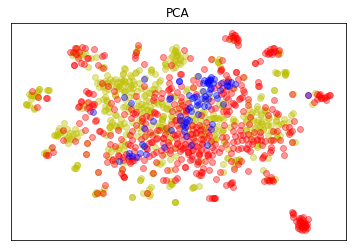

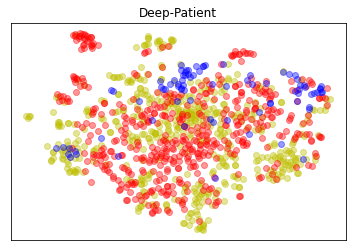

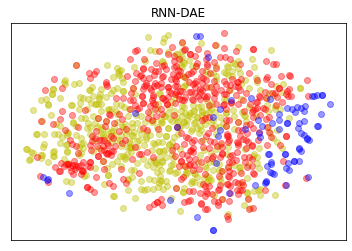

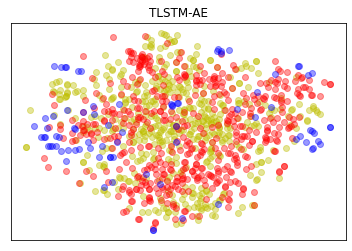

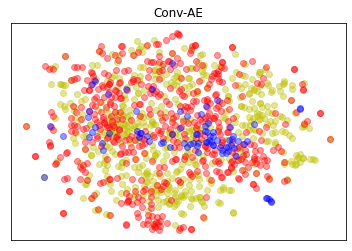

time: 2min 54s


In [37]:
generate_plot(PCA_Embedding_100[idx], label, color_dic, legend, title="PCA")
generate_plot(DAE_Embedding_100[idx], label, color_dic, legend, title="Deep-Patient")
generate_plot(RNNAE_Embedding_100[idx], label, color_dic, legend, title="RNN-DAE")
generate_plot(TLSTMAE_Embedding_100[idx], label, color_dic, legend, title="TLSTM-AE")
generate_plot(ConvAE_Embedding_100[idx], label, color_dic, legend, title="Conv-AE")

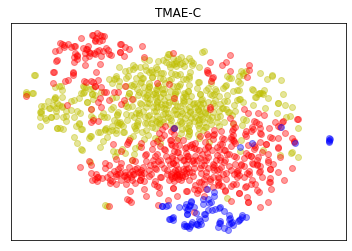

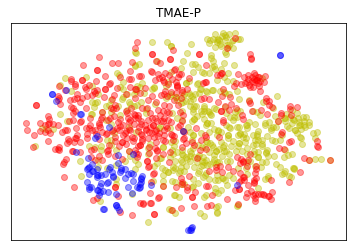

time: 46 s


In [14]:
generate_plot(TMAE_C_Embedding_100[idx], label, color_dic, legend, title="TMAE-C")
generate_plot(TMAE_P_Embedding_100[idx], label, color_dic, legend, title="TMAE-P")

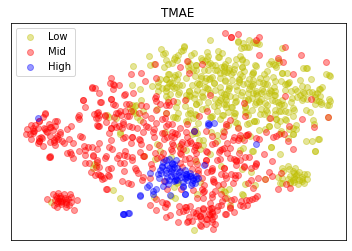

time: 30.2 s


In [12]:
generate_plot(TMAE_Embedding_100[idx], label, color_dic, legend, title="TMAE", legend_flag=True)

# different dimension

In [18]:
def generate_scores(path, idx, label):
    ch_list, db_list = [], []
    for dim in [100,200,300,400,500]:
        embedding = pickle.load(open(path+str(dim),"rb"))
        ch_score, db_score = scores(embedding[idx], label)
        ch_list.append(ch_score)
        db_list.append(db_score)
    return ch_list, db_list

time: 1.77 ms


In [19]:
pca_path = "../../MODELS/PCA/Embeddings/PCA_Embedding_"
pca_ch_list, pca_db_list = generate_scores(pca_path, idx, label)

ch_score, db_score: 12.70377300841514 6.584123729891669
ch_score, db_score: 11.176617319924029 7.183648253158459
ch_score, db_score: 10.451670708553896 7.48489715909441
ch_score, db_score: 10.135345061867259 7.642298463884397
ch_score, db_score: 10.014826258855145 7.71219572040273
time: 6.03 s


In [20]:
dae_path = "../../MODELS/DAE/Embeddings/DAE_Embedding_"
dae_ch_list, dae_db_list = generate_scores(dae_path, idx, label)

ch_score, db_score: 18.867490363805196 5.216695833825535
ch_score, db_score: 16.534419861634568 5.756471524314005
ch_score, db_score: 15.761377685911237 5.849346362451288
ch_score, db_score: 18.59142413091096 5.30276992198253
ch_score, db_score: 13.57480465629845 6.432776976854285
time: 2.29 s


In [21]:
rnnae_path = "../../MODELS/RNNAE/Embeddings/RNNAE_Embedding_"
rnnae_ch_list, rnnae_db_list = generate_scores(rnnae_path, idx, label)

ch_score, db_score: 13.772078759223326 7.895503905266378
ch_score, db_score: 11.721905385365986 8.652809227266106
ch_score, db_score: 11.480254636776325 8.661655639030426
ch_score, db_score: 10.807740032368264 8.94607375551639
ch_score, db_score: 10.872745461118198 8.646345462578457
time: 2.42 s


In [22]:
tmae_path = "../../MODELS/TMAE/Embeddings/TMAE_Embedding_"
tmae_ch_list, tmae_db_list = generate_scores(tmae_path, idx, label)

ch_score, db_score: 34.15444122496187 4.414862227225815
ch_score, db_score: 34.76672195030735 4.408428541604893
ch_score, db_score: 33.70422817022439 4.432784189726637
ch_score, db_score: 34.64144342354499 4.350715278801545
ch_score, db_score: 31.626580697518953 4.591732120698086
time: 2.24 s


In [23]:
tmae_c_path = "../../MODELS/TMAE-C/TMAE_Embedding_"
tmae_c_ch_list, tmae_c_db_list = generate_scores(tmae_c_path, idx, label)

ch_score, db_score: 36.547732325380395 4.207223169959453
ch_score, db_score: 43.399573186060934 3.8670943499892387
ch_score, db_score: 38.146644666380254 4.126553144515189
ch_score, db_score: 41.41764696813439 3.9954125886217766
ch_score, db_score: 42.11553247333347 3.97888417151821
time: 1.87 s


In [24]:
tmae_p_path = "../../MODELS/TMAE-P/TMAE_Embedding_"
tmae_p_ch_list, tmae_p_db_list = generate_scores(tmae_p_path, idx, label)

ch_score, db_score: 16.841779319440214 6.646129231216775
ch_score, db_score: 16.207517460767818 6.799903190121671
ch_score, db_score: 16.331811996496796 6.748445510010512
ch_score, db_score: 14.971123520727403 7.004450662195108
ch_score, db_score: 15.419852315338103 6.99062814355664
time: 2.46 s


In [25]:
# cost
tlstmae_ch_list = [12.10, 11.51, 11.25, 11.11, 11.72]
tlstmae_db_list = [8.02, 8.39, 8.22, 8.64, 8.61]

time: 1.14 ms


In [26]:
# cost
convae_ch_list = [14.20, 14.89, 15.01, 15.19, 14.28]
convae_db_list = [6.80, 6.55, 6.79, 6.71, 6.74]

time: 12.1 ms


# Cost

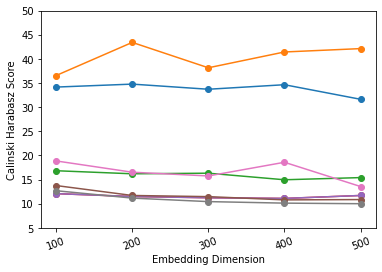

time: 387 ms


In [38]:
plt.plot(tmae_ch_list, 'o-', label="TMAE")
plt.plot(tmae_c_ch_list, 'o-', label="C-TMAE")
plt.plot(tmae_p_ch_list, 'o-', label="P-TMAE")

plt.plot(tlstmae_ch_list, 'o-', label="CONVAE")
plt.plot(tlstmae_ch_list, 'o-', label="TLSTMAE")
plt.plot(rnnae_ch_list, 'o-', label="RNNAE")
plt.plot(dae_ch_list, 'o-', label="DAE")
plt.plot(pca_ch_list, 'o-', label="PCA")

plt.xlabel("Embedding Dimension")
plt.ylabel("Calinski Harabasz Score")
plt.ylim(5,50)
plt.xticks(range(5), ['100', '200', '300', "400", "500"], rotation=20)
# lgd = plt.legend(loc='upper right', bbox_to_anchor=(1.28, 1.03))
plt.savefig("Cost_CH_score")
plt.show()

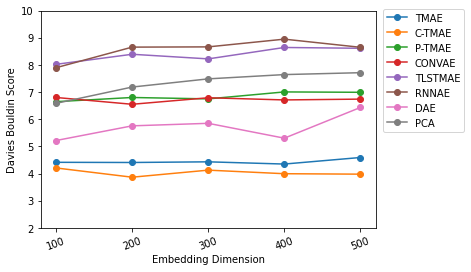

time: 402 ms


In [35]:
plt.plot(tmae_db_list, 'o-', label="TMAE")
plt.plot(tmae_c_db_list, 'o-', label="C-TMAE")
plt.plot(tmae_p_db_list, 'o-', label="P-TMAE")

plt.plot(convae_db_list, 'o-', label="CONVAE")
plt.plot(tlstmae_db_list, 'o-', label="TLSTMAE")
plt.plot(rnnae_db_list, 'o-', label="RNNAE")
plt.plot(dae_db_list, 'o-', label="DAE")
plt.plot(pca_db_list, 'o-', label="PCA")

plt.xlabel("Embedding Dimension")
plt.ylabel("Davies Bouldin Score")
plt.ylim(2, 10)
plt.xticks(range(5), ['100', '200', '300', "400", "500"], rotation=20)
lgd = plt.legend(loc='upper right', bbox_to_anchor=(1.28, 1.03))
plt.savefig("Cost_DB_score", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()